# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
#  FIX PYTHON PATH FOR NOTEBOOK
# -------------------------

# Path to project root (one level above 'notebooks')
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Path to `scripts` directory
scripts_path = os.path.join(project_root, "scripts")

# Add both project root and scripts folder to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

if scripts_path not in sys.path:
    sys.path.append(scripts_path)

print("Project root:", project_root)
print("Scripts path:", scripts_path)

# -------------------------
#  IMPORTS
# -------------------------

try:
    from scripts.preprocessing import ReviewPreprocessor
    from scripts.scraper import main as run_scraper
    print("Imports successful!")
except ModuleNotFoundError as e:
    print("Import failed:", e)
    raise


Project root: /Users/elbethelzewdie/Documents/customer-satisfaction-week2/customer-satisfaction-week2
Scripts path: /Users/elbethelzewdie/Documents/customer-satisfaction-week2/customer-satisfaction-week2/scripts
Imports successful!


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3251567
Total Ratings: 38826
Total Reviews: 8333

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.192429
Total Ratings: 6322
Total Reviews: 1218

Dashenbank: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.133479
Total Ratings: 3893
Total Reviews: 769

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 800 reviews
Collected 800 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:04<00:08,  4.47s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 800 reviews
Collected 800 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:08<00:04,  4.51s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 763 reviews
Collected 763 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:13<00:00,  4.57s/it]



Scraping Complete!

Total reviews collected: 2363
Reviews per bank:
  Commercial Bank of Ethiopia: 800
  Bank of Abyssinia: 800
  Dashen Bank: 763

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐
Review: this app very bad 👎...
Date: 2025-11-27 16:28:10

Rating: ⭐⭐⭐⭐⭐
Review: the most advanced app. but how to stay safe?...
Date: 2025-11-27 10:03:41

Rating: ⭐⭐⭐⭐
Review: Good application...
Date: 2025-11-27 08:59:12

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good jop...
Date: 2025-11-27 13:19:25

Rating: ⭐⭐⭐⭐⭐
Review: ok...
Date: 2025-11-27 12:46:01

Rating: ⭐
Review: bad exprience...it is so crushed...
Date: 2025-11-27 11:41:15

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: its fast and easy to communicate to the app and its available all area keep it up.i will make H

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad 👎,1,2025-11-27 16:28:10,Sulxaan Huseen,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,Sayid Ahmad,0,None,CBE,Commercial Bank of Ethiopia,4.4.0,Google Play
2,81000db5-aa51-467e-826c-fc96160e96a8,Good application,4,2025-11-27 08:59:12,Hiwot Gebrie,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,3d88a334-958c-4717-9f97-c5d46359e054,It is nice app,5,2025-11-26 12:03:18,samson getachew,1,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,99d376ea-4824-4af9-a093-27360acc3a5c,best,5,2025-11-25 20:27:20,Nejbadin Ali,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 2363 reviews

[1/8] Checking for missing data...

Missing values:
  reply_content: 2361 (99.92%)
  app_id: 501 (21.20%)

[2/8] Handling missing values...

[3/8] Normalizing dates...
Date range: 2024-05-01 to 2025-11-27

[4/8] Cleaning text...

[5/8] Removing duplicate reviews...
Removed 464 duplicate reviews

[6/8] Removing non-English language reviews...
Removed 344 non-English reviews

[7/8] Validating ratings...
All ratings are valid (1-5)

[8/8] Preparing final output...
Final dataset: 1555 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 2363
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1555

Data retention rate: 65.81%
Data error rate: 34.19%
⚠ Data quality: NEEDS ATTENTION (>10% errors)

Reviews per bank:
  Bank of Abyssinia: 546
  Commercial Bank of Ethiopia: 520
  Dashen Bank: 489

Ratin

## 3. Visualizations

Let's explore the cleaned data.

In [4]:
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


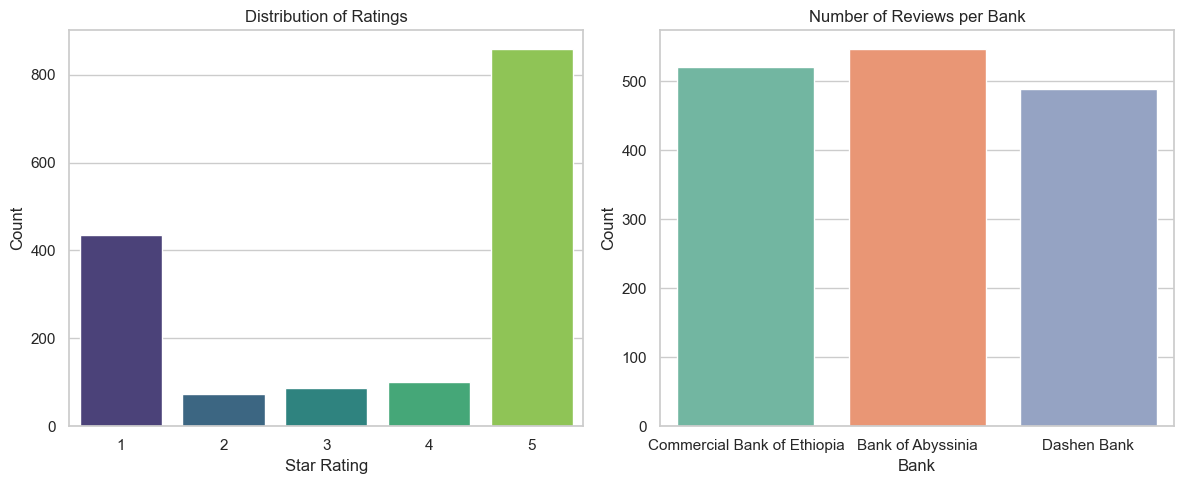

In [5]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_name', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

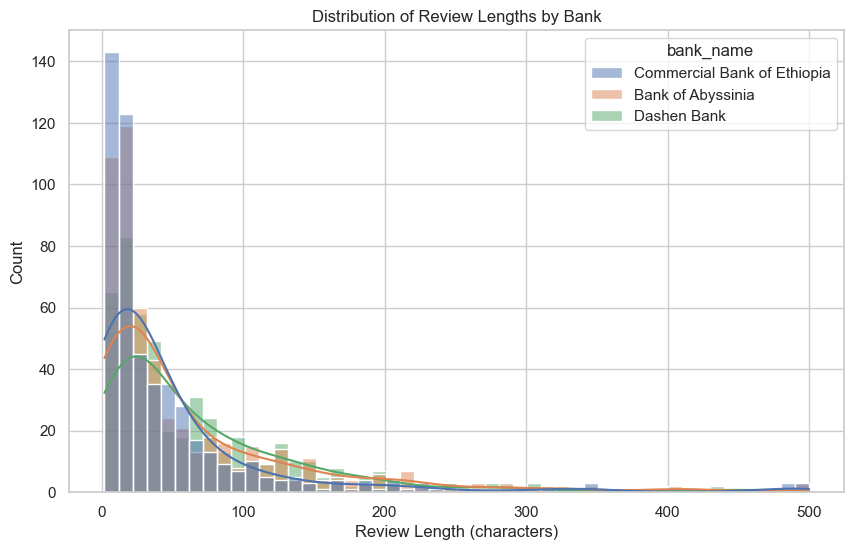

In [6]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_name')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()